In [15]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd
from pprint import pprint
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import StratifiedKFold
from scipy import stats
import numpy as np
from sklearn import linear_model, svm
import re
from sklearn.metrics import roc_curve, auc,f1_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
#s = "../braindata/data_1_mor_select_100.csv"
import os          
from sklearn import linear_model, svm
from sklearn.ensemble import ExtraTreesClassifier

os.getcwd()
os.chdir('../braindata')
#dd =pd.read_csv("data_3_all.csv",header=0)
dd =pd.read_csv("NBS_connectome_3M_count2_vector.csv",header=0)
data=np.array(dd)
#print(data.shape)
idx_IN_columns = np.append(np.array([1]),np.array(range(2,data.shape[1])))
X=data[:,idx_IN_columns]
#features=data[:,11:data.shape[1]]
#features = features.transpose()
X = stats.zscore(X)
#print(features.shape)
y=data[:,0]
#5: ad-smi / 6:mci-smi / 7:adonly-smi / 8:ad-mci / 9:adonly-mci / 10:adonly - adwithsmallvv

ind_num=np.isnan(y)
# print(ind_num.shape)


y_no_nan = y[~ind_num]

X_no_nan = X[~ind_num,:]

       # print(y.shape)

y=y_no_nan
X=X_no_nan
feature_num_all=[]
lr_all_feature=[]
svm_all_feature=[]
lr_fls_feature=[]
svm_fls_feature=[]
base_labels= []

#X=X.reshape(X.size,1)
#X=X.astype(np.float64,copy=False)
np.isnan(X).any()
#feature_num=features.shape[1]
X[np.isnan(X)] = np.median(X[~np.isnan(X)])
clf = ExtraTreesClassifier(n_estimators=50,
                              random_state=0)
clf = clf.fit(X, y)
importances = clf.feature_importances_
importances
indices = np.argsort(importances)[::-1]
#print("Feature ranking:")

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
#n_features = [2,5,10,20,40,50,70,80,100,1000,10000,3000,4000,500,5000,6000,7000,8000,9000,10000,20000]
n_features = [30]

#n_features = [6000]
n_features.sort()
lr_all_accs = []
lr_all_scores = []
lr_f1s = []
svm_all_accs = []
svm_all_scores = []
svm_f1s = []
base_labels = []

for i in n_features:
#     #print(i)
    
#     #lsvc = LinearSVC(C=J[i],penalty="l1", dual=True).fit(X, y)
#     #model = SelectFromModel(lsvc, prefit=True)
#     #features = model.transform(X)
#     clf = ExtraTreesClassifier(n_estimators=250,
#                               random_state=0)
#     clf = clf.fit(X, y)
#     importances = forest.feature_importances_
       
    index=indices[0:i]
    features=X[:,index]
#     clf.feature_importances_ 

#     model = SelectFromModel(clf, threshold=0.6,prefit=True)
#     features = model.transform(X)
#     features.shape               
#     #features=features.reshape(features.size,1)
#     #features=features.astype(np.float64,copy=false)
#     np.isnan(features).any()
    feature_num=features.shape[1]
    print(feature_num)
    
#    lr_all_accs = []
#     lr_all_scores = []
#     lr_f1s = []
#     svm_all_accs = []
#     svm_all_scores = []
#     svm_f1s = []
    #base_labels = []
    for runs in range(10):
        lr_accuracies = []
        lr_scores = []
        svm_accuracies = []
        svm_scores = []
        strat_labels = []
        
        logistic = linear_model.LogisticRegression(C=1e5)
        rbf = svm.SVC(C=10,kernel='linear',gamma=0.01)

        skf = StratifiedKFold(n_splits=3)
        for train_index, test_index in skf.split(features, y):
                    train_data, test_data = features[train_index], features[test_index]
                    train_labels, test_labels = y[train_index], y[test_index]

                    strat_labels = np.append(strat_labels, test_labels)

                    log = logistic.fit(train_data, train_labels)
                    log_prob = log.decision_function(test_data)
                    log_acc = log.score(test_data, test_labels)

                    #f1 calculation
                    y_pred = logistic.predict(test_data)
                    log_f1 = f1_score(test_labels, y_pred)

                    lr_accuracies = np.append(lr_accuracies, log_acc)
                    lr_scores = np.append(lr_scores, log_prob)
                    lr_f1s = np.append(lr_f1s, log_f1)
                    #print('Logistic Regression Accuracy: %f' % log_acc)

                    rbf = rbf.fit(train_data, train_labels)
                    svm_acc = rbf.score(test_data, test_labels)
                    svm_prob = rbf.decision_function(test_data)

                    #f1 calculation
                    y_pred = rbf.predict(test_data)
                    svm_f1 = f1_score(test_labels, y_pred)
                    #print('SVM Accuracy: %f' % svm_acc)
                    svm_accuracies = np.append(svm_accuracies, svm_acc)
                    svm_scores = np.append(svm_scores, svm_prob)
                    svm_f1s = np.append(svm_f1s, svm_f1)
                    
        base_labels = np.append(base_labels, strat_labels)
        lr_all_scores = np.append(lr_all_scores, lr_scores)
        lr_fold_avg = np.mean(lr_accuracies)
        lr_all_accs = np.append(lr_all_accs, lr_fold_avg)
        svm_all_scores = np.append(svm_all_scores, svm_scores)
        svm_fold_avg = np.mean(svm_accuracies)
        svm_all_accs = np.append(svm_all_accs, svm_fold_avg)

30


/Users/posnerlab/Library/Python/3.5/lib/python/site-packages/scipy/stats/stats.py:2247: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


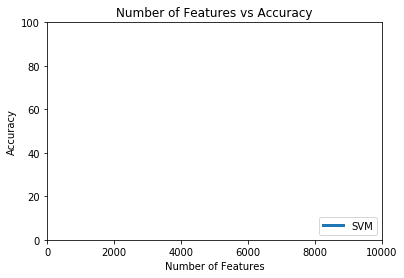

[ 0.88888889  0.90909091  0.72727273  0.88888889  0.90909091  0.72727273
  0.88888889  0.90909091  0.72727273  0.88888889  0.90909091  0.72727273
  0.88888889  0.90909091  0.72727273  0.88888889  0.90909091  0.72727273
  0.88888889  0.90909091  0.72727273  0.88888889  0.90909091  0.72727273
  0.88888889  0.90909091  0.72727273  0.88888889  0.90909091  0.72727273]
[ 0.94365344  0.94365344  0.94365344  0.94365344  0.94365344  0.94365344
  0.94365344  0.94365344  0.94365344  0.94365344]
LR accuracy Avg: nan
LR accuracy Standard Deviation: nan
LR f1s Avg : nan
LR f1s Standard Deviation: 0.1119750110997703
SVM Avg: nan
SVM Standard Deviation: 1.1102230246251565e-16
SVM f1s Avg : nan
SVM f1s Standard Deviation: nan


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [16]:
import matplotlib.pyplot as plt
plt.figure()
#plt.plot( (feature_num_all), lr_all_feature*100, lw=3, label='Logistic Regression')
plt.plot( (feature_num_all), svm_all_feature*100, lw=3, label='SVM')
plt.xlim([0, 10000])
plt.ylim([0, 100])
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs Accuracy')
plt.legend(loc="lower right")
#plt.savefig('AD_SMI_ALL.eps')
plt.show()

svm_f1s=svm_f1s[np.nonzero(svm_f1s)]
print(svm_f1s)
print(svm_all_accs)

print("LR accuracy Avg: {}".format(np.mean(lr_all_feature)))
print("LR accuracy Standard Deviation: {}".format(np.std(lr_all_feature)))

print("LR f1s Avg : {}".format(np.mean( lr_fls_feature)))
print("LR f1s Standard Deviation: {}".format(np.std(lr_f1s)))

print("SVM Avg: {}".format(np.mean(svm_all_feature)))
print("SVM Standard Deviation: {}".format(np.std(svm_all_accs)))

print("SVM f1s Avg : {}".format(np.mean( svm_fls_feature )))
print("SVM f1s Standard Deviation: {}".format(np.std(svm_fls_feature)))
#print(lr_all_accs)

In [17]:
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
clf = clf.fit(X, y)
importances = clf.feature_importances_
importances
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 4599 (0.003678)
2. feature 4601 (0.003280)
3. feature 6281 (0.002895)
4. feature 875 (0.002875)
5. feature 6382 (0.002769)
6. feature 5298 (0.002765)
7. feature 2422 (0.002747)
8. feature 7450 (0.002729)
9. feature 6870 (0.002711)
10. feature 6958 (0.002709)
11. feature 2761 (0.002646)
12. feature 135 (0.002478)
13. feature 366 (0.002363)
14. feature 4541 (0.002125)
15. feature 766 (0.001893)
16. feature 1525 (0.001892)
17. feature 3696 (0.001862)
18. feature 5330 (0.001837)
19. feature 1881 (0.001782)
20. feature 4785 (0.001777)
21. feature 7078 (0.001773)
22. feature 2597 (0.001750)
23. feature 1263 (0.001728)
24. feature 1222 (0.001708)
25. feature 4143 (0.001681)
26. feature 1415 (0.001667)
27. feature 3020 (0.001631)
28. feature 4098 (0.001622)
29. feature 1859 (0.001590)
30. feature 316 (0.001588)
31. feature 185 (0.001577)
32. feature 5846 (0.001517)
33. feature 4821 (0.001506)
34. feature 5 (0.001500)
35. feature 7662 (0.001497)
36. feature 3682 (0.0

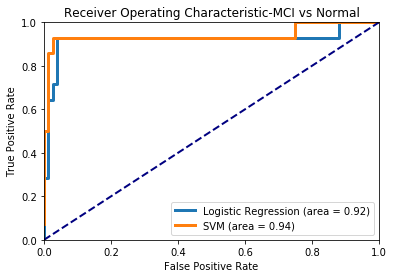

In [19]:
from sklearn.metrics import roc_curve, auc,f1_score
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()

fpr['lr'], tpr['lr'], _ = roc_curve(base_labels, lr_all_scores)
roc_auc['lr'] = auc(fpr['lr'], tpr['lr'])
#f1['lr']=f1_score(fpr['lr'], tpr['lr'])
fpr['svm'], tpr['svm'], _ = roc_curve(base_labels, svm_all_scores)
roc_auc['svm'] = auc(fpr['svm'], tpr['svm'])
#f1['svm']=f1_score(fpr['svm'], tpr['svm'])
#fpr['gcn'], tpr['gcn'], _ = roc_curve(all_labels, all_scores)
#roc_auc['gcn'] = auc(fpr['gcn'], tpr['gcn'])

plt.figure()
plt.plot(fpr['lr'], tpr['lr'], lw=3, label='Logistic Regression (area = %0.2f)' % roc_auc['lr'] )
#plt.plot(fpr['lr'], tpr['lr'], lw=3, label='Logistic Regression (f1 = %0.2f)' % f1['lr'] )
plt.plot(fpr['svm'], tpr['svm'], lw=3, label='SVM (area = %0.2f)' % roc_auc['svm'] )
#plt.plot(fpr['svm'], tpr['svm'], lw=3, label='SVM (f1 = %0.2f)' % f1['svm'] )
#plt.plot(fpr['gcn'], tpr['gcn'], lw=3, label='GCN (area = %0.2f)' % roc_auc['gcn'])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-MCI vs Normal')
plt.legend(loc="lower right")
#plt.savefig('10x_Combined_ROC.eps')
plt.savefig('ROC_monk_ssri_connectome_count.eps')
plt.show()

In [ ]:
f1['lr']=f1_score(fpr['lr'], tpr['lr'])


In [ ]:
lr_all_scores .shape

In [ ]:
os.getcwd()
os.chdir('../idp_jiook_local/braindata')

In [ ]:
 lr_fls_feature.shape

In [ ]:
np.isnan(features)

In [ ]:
print(range(10))

In [ ]:
np.log(20000)